In [1]:
%matplotlib inline

# Polynomial and Spline interpolation

*This tutorial is based on a [scikit learn documentation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py) provided by Mathieu Blondel, Jake Vanderplas, Christian Lorentzen and Malte Londschien*

Prerequisites:

- Use `conda update --all` to make sure you have the latest release of scikit learn. Afterwards, restart your kernel.

In [2]:
import pandas as pd

# data preparation
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/wage.csv')

X = df[['age']]
y = df[['wage']]

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

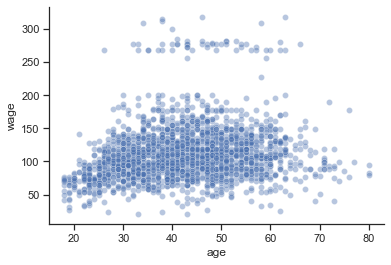

In [12]:
import seaborn as sns  

sns.scatterplot(x=X_train['age'], y=y_train['wage'], alpha=0.4);

We use a pipeline to add non-linear features to a ridge regression model.

In [1]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

In [9]:
# use polynomial features with degree 3
model = make_pipeline(PolynomialFeatures(degree=3), 
                      Ridge(alpha=1))

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

In [10]:
# B-spline
model = make_pipeline(SplineTransformer(n_knots=4, degree=3), 
                     Ridge(alpha=1))
                     
model.fit(X_train, y_train)

y_pred = model.predict(X_train)